# Seaborn

Seabornはmatplotlibをもとにした高レベルインターフェースを持ったデータ可視化ライブラリであり、matplotlibと比較し、少ないコードできれいな図を作れたり、回帰直線が入った散布図など統計的なグラフを作成することができる。

## seaborn.objects

バージョン0.12から導入された、matplotを介さない新しいインターフェースを持ったAPI。※現在開発中の機能

個人的に使いやすいが、現状凡例を外に出せないので（ver.0.13.2）、利用する場面が限られてしまう。

## グラフの種類

- 散布図
- バブルチャート
- 棒グラフ
- 積み上げ棒グラフ
- 折れ線グラフ
- 面グラフ
- ~~ツリーマップ~~
- 100%積み上げグラフ
- ~~円グラフ~~
- ヒストグラム
- ~~箱ひげ図~~
- ~~バイオリンプロット~~
- ~~ヒートマップ~~

### グラフ作成の流れ

1. `so.Plot()`でグラフの基礎を作成する。
2. `.add()`でグラフの種類などの情報を加える。
3. `.facet()`などでグラフを分割する（必要があれば）。
4. `.layout()`や`.theme()`で見た目を変える。

#### ライブラリのインポート

In [1]:
import seaborn as sns
import seaborn.objects as so
import pandas as pd
import os

# 日本語対応するための設定
if os.name == "nt":
    fontfamily = "Yu Gothic"
else:
    fontfamily = "Noto Sans CJK JP"

color_palette = sns.color_palette(n_colors=8)


base_style = {
    "axes.facecolor": "white",     # グラフの色：白
    "xtick.bottom": True,          # X軸の目盛りを設定
    "xtick.direction": "in",       # X軸の目盛りを内側
    "xtick.minor.visible": True,   # X軸の副目盛りを設定
    "ytick.left": True,            # Y軸の目盛りを設定
    "ytick.direction": "in",       # Y軸の目盛りを内側
    "ytick.minor.visible": True,   # Y軸の副目盛りを設定
    "axes.spines.top": True,      # 上側を表示
    "axes.spines.right": True,    # 右側を表示
    "axes.edgecolor": "black",     # 軸の色：黒
    "font.family": fontfamily,
    }

## 散布図（`seaborn.objects.Dot()`）

### 主な引数とその説明

[seaborn.objects.DotのAPI](https://seaborn.pydata.org/generated/seaborn.objects.Dot.html)


| 引数      | 説明            |
| --------- | ------------------------- |
|marker|プロットの形状。詳しい説明は[こちら](https://seaborn.pydata.org/tutorial/properties.html#marker-property)|
|pointsize|プロットのサイズ。`float`型を渡す。`seaborn.objcets.Plot()`で設定していた場合、その内容を上書きする。|
|color|プロットの色。`str`型を渡す。`seaborn.objcets.Plot()`で設定していた場合、その内容を上書きする。|
|alpha|プロットの透明度。0～1の`float`型を渡す。|
|edgecolor|プロットの縁の色。`str`型を渡す。|
|edgealpha|プロットの縁の透明度。0～1の`float`型を渡す。|

In [2]:
# データの読み込み
scatter_df = pd.read_csv("../data/diabetes.csv")
scatter_df.loc[scatter_df["sex"] == 1, "sex"] = "men"
scatter_df.loc[scatter_df["sex"] == 2, "sex"] = "women"
scatter_df.head()

C:\Users\atsu9\AppData\Local\Temp\ipykernel_55852\4023183551.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'men' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  scatter_df.loc[scatter_df["sex"] == 1, "sex"] = "men"


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,59,women,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,men,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,women,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,men,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,men,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


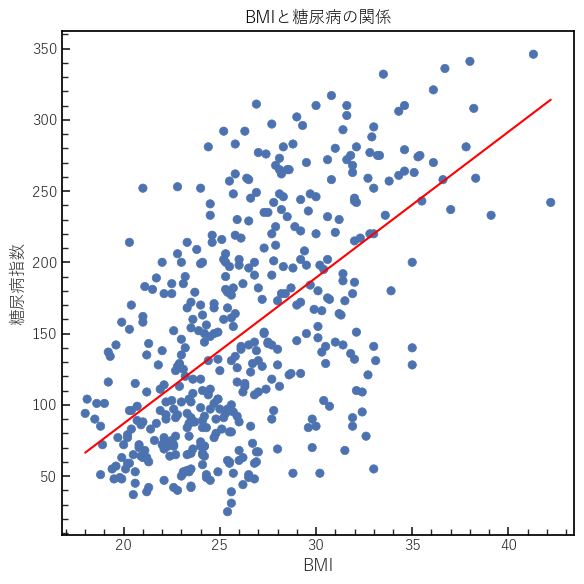

In [3]:
plot = (
    so.Plot(
        data=scatter_df,
        x="bmi",
        y="y",
    )
    .add(so.Dot())
    .add(so.Line(color="red"), so.PolyFit(order=1))
    .theme(base_style)
    .layout(size=(6, 6))
    .label(
        x="BMI",
        y="糖尿病指数",
        title="BMIと糖尿病の関係"
    )
)

plot.show()

## バブルチャート（`seaborn.objects.Dot()`）

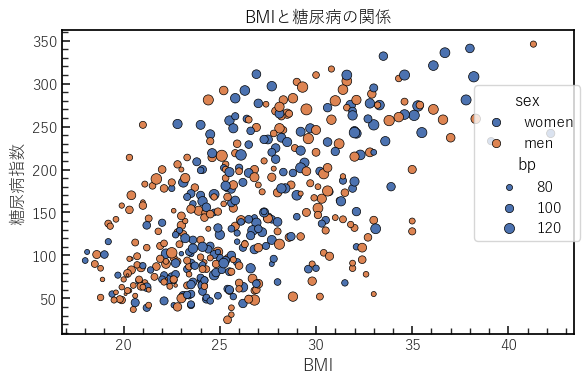

In [4]:
plot = (
    so.Plot(
        data=scatter_df,
        x="bmi",
        y="y",
        color="sex",
        pointsize="bp",
    )
    .add(so.Dot(edgecolor="black"))
    # .facet(col="sex")
    .share(y=True)
    .theme(base_style)
    .layout(size=(6, 4))
    .label(
        x="BMI",
        y="糖尿病指数",
        title="BMIと糖尿病の関係",
    )
)

plot.show()

## 棒グラフ（`seaborn.objects.Bar()`）

### 主な引数とその説明

[seaborn.objects.BarのAPI](https://seaborn.pydata.org/generated/seaborn.objects.Bar.html)


| 引数      | 説明            |
| --------- | ------------------------- |
|color|バーの色。`str`型を渡す。`seaborn.objcets.Plot()`で設定していた場合、その内容を上書きする。|
|alpha|バーの透明度。0～1の`float`型を渡す。|
|edgecolor|バーの縁の色。`str`型を渡す。|
|edgealpha|バーの縁の透明度。0～1の`float`型を渡す。|

In [5]:
bar_df = pd.read_csv(
    "../data/city_temperature.csv",
    sep="\t",  # タブ区切りのデータを取得
    index_col=None,
    parse_dates=["date"],  # 文字列から日付データに変換したい列名
    date_format="%Y%m%d",  # 日付データのフォーマット 例) 20111001 -> 2011-10-01
)

bar_df["month"] = bar_df["date"].dt.month
# bar_df = bar_df.set_index("date")
# bar_df = bar_df.groupby("month").mean().reset_index()

bar_df

,date,New York,San Francisco,Austin,month
0,2011-10-01,63.4,62.7,72.2,10
1,2011-10-02,58.0,59.9,67.7,10
2,2011-10-03,53.3,59.1,69.4,10
3,2011-10-04,55.7,58.8,68.0,10
4,2011-10-05,64.2,58.7,72.4,10
...,...,...,...,...,...
361,2012-09-26,68.5,53.6,79.6,9
362,2012-09-27,69.2,52.1,76.4,9
363,2012-09-28,68.7,52.6,77.2,9
364,2012-09-29,62.5,53.9,75.2,9


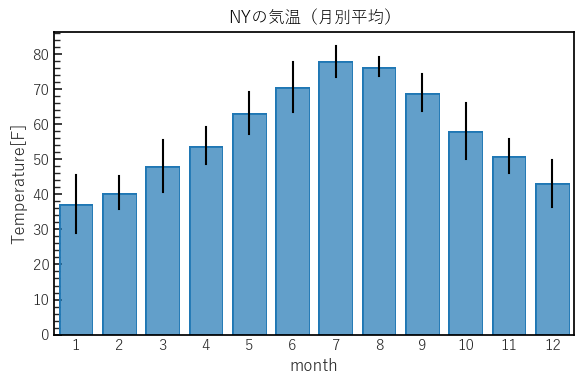

In [6]:
plot = (
    so.Plot(
        data=bar_df,
        x="month",
        y="New York",
    )
    .add(
        so.Bar(color=color_palette[0]),
        so.Agg(),  # 平均をとる
    )
    .add(
        so.Range(color="black"),             # errorbar間隔を追加
        so.Est(errorbar="sd"),  # errorbar追加
    )
    .scale(x=so.Nominal(order=[month for month in range(1, 13)]))
    .theme({**base_style, "xtick.bottom": False})
    .layout(size=(6, 4))
    .label(
        x="month",
        y="Temperature[F]",
        title="NYの気温（月別平均）",
    )
)
plot.show()

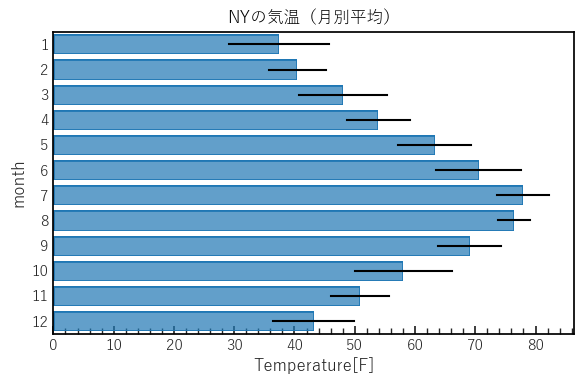

In [7]:
plot = (
    so.Plot(
        data=bar_df,
        x="New York",
        y="month",
    )
    .add(
        so.Bar(color=color_palette[0]),
        so.Agg("mean"),  # 平均をとる
        orient="h"
    )
    .add(
        so.Range(color="black"),             # errorbar間隔を追加
        so.Est(errorbar="sd"),  # errorbar追加
        orient="h"
    )
    .scale(y=so.Nominal(order=[month for month in range(1, 13)]))
    .theme({**base_style, "ytick.left": False})
    .layout(size=(6, 4))
    .label(
        x="Temperature[F]",
        y="month",
        title="NYの気温（月別平均）",
    )
)
plot.show()

In [8]:
bar_df2 = bar_df.iloc[:, 1:].melt(
    id_vars="month", var_name="city", value_name="temperature"
)
bar_df2

,month,city,temperature
0,10,New York,63.4
1,10,New York,58.0
2,10,New York,53.3
3,10,New York,55.7
4,10,New York,64.2
...,...,...,...
1093,9,Austin,79.6
1094,9,Austin,76.4
1095,9,Austin,77.2
1096,9,Austin,75.2


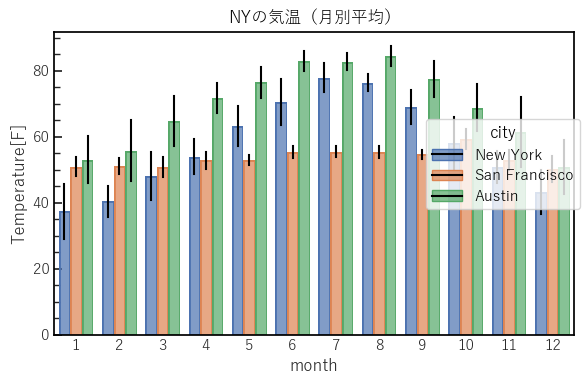

In [9]:
plot = (
    so.Plot(
        data=bar_df2,
        x="month",
        y="temperature",
        color="city"
    )
    .add(
        so.Bar(),
        so.Agg(),  # 平均をとる
        so.Dodge()
    )
    .add(
        so.Range(color="black"),             # errorbar間隔を追加
        so.Est(errorbar="sd"),  # errorbar追加
        so.Dodge()
    )
    .scale(x=so.Nominal(order=[month for month in range(1, 13)]))
    .theme({**base_style, "xtick.bottom": False})
    .layout(size=(6, 4))
    .label(
        x="month",
        y="Temperature[F]",
        title="NYの気温（月別平均）",
    )
)
plot.show()

## 積み上げ棒グラフ(`seaborn.objects.Bar()`と`seaborn.objects.Stack()`)

`seaborn.objects.Bar()`を積み上げ棒グラフへ変換する。

### 主な引数とその説明

[seaborn.objects.StackのAPI](https://seaborn.pydata.org/generated/seaborn.objects.Stack.html)

特になし。

In [10]:
stacked_bar_df = pd.read_csv("../data/japan_energy.csv")
stacked_bar_df["年度"] = stacked_bar_df["年度"].astype(int)
stacked_bar_df = stacked_bar_df.melt(id_vars="年度", var_name="エネルギー種", value_name="供給量")
stacked_bar_df.head()

,年度,エネルギー種,供給量
0,1965,石油,3.56
1,1966,石油,4.13
2,1967,石油,5.11
3,1968,石油,5.95
4,1969,石油,7.19


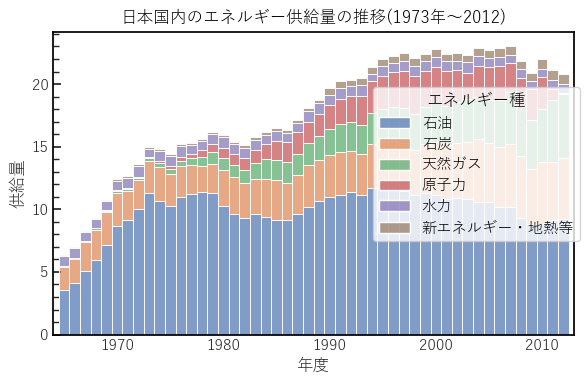

In [11]:
plot = (
    so.Plot(
        data=stacked_bar_df,
        x="年度",
        y="供給量",
        color="エネルギー種"
    )
    .add(
        so.Bars(),
        so.Stack()
    )
    .theme({**base_style, "xtick.bottom": False})
    .layout(size=(6, 4))
    .limit(x=(1965 - 1, 2012 + 1))
    .label(
        title="日本国内のエネルギー供給量の推移(1973年～2012)",
    )
)
plot.show()

## 折れ線グラフ（`seaborn.objects.Line()`）

### 主な引数とその説明

[seaborn.objects.LineのAPI](https://seaborn.pydata.org/generated/seaborn.objects.Line.html)


| 引数      | 説明            |
| --------- | ------------------------- |
|color|ラインの色。`str`型を渡す。`seaborn.objcets.Plot()`で設定していた場合、その内容を上書きする。|
|alpha|ラインの透明度。0～1の`float`型を渡す。|
|linewidth|ラインの太さ。`float`型を渡す。|
|linestyle|ラインの形状。`str`型を渡す。|
|marker|ライン上のプロット|
|pointsize|ライン上に設置されたプロットのサイズ|
|edgecolor|プロットの縁の色。`str`型を渡す。|
|edgealpha|プロットの縁の透明度。0～1の`float`型を渡す。|

In [12]:
# プロット用のデータ取得

plot_df = pd.read_csv(
    "../data/city_temperature.csv",
    sep="\t",  # タブ区切りのデータを取得
    index_col=None,
    parse_dates=["date"],  # 文字列から日付データに変換したい列名
    date_format="%Y%m%d",  # 日付データのフォーマット 例) 20111001 -> 2011-10-01
)

plot_df = plot_df.melt("date", var_name="city", value_name="temperature")

# データの確認
plot_df.head()

,date,city,temperature
0,2011-10-01,New York,63.4
1,2011-10-02,New York,58.0
2,2011-10-03,New York,53.3
3,2011-10-04,New York,55.7
4,2011-10-05,New York,64.2


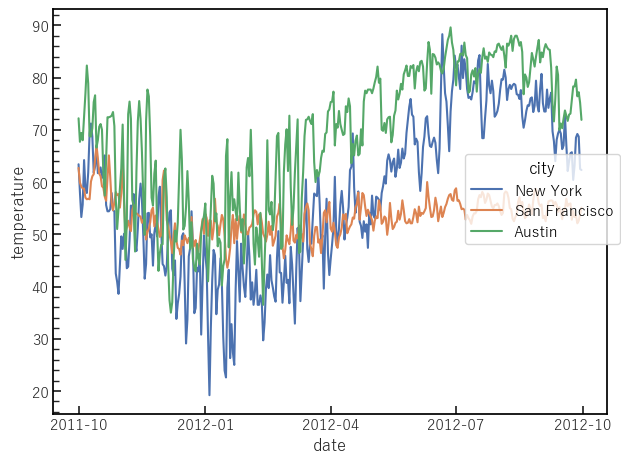

In [13]:
plot = (
    so.Plot(
        data=plot_df,
        x="date",
        y="temperature",
        color="city"
    )
    .theme({**base_style, "xtick.minor.visible": False,})
    .add(
        so.Line(),
    )
)

plot.show()

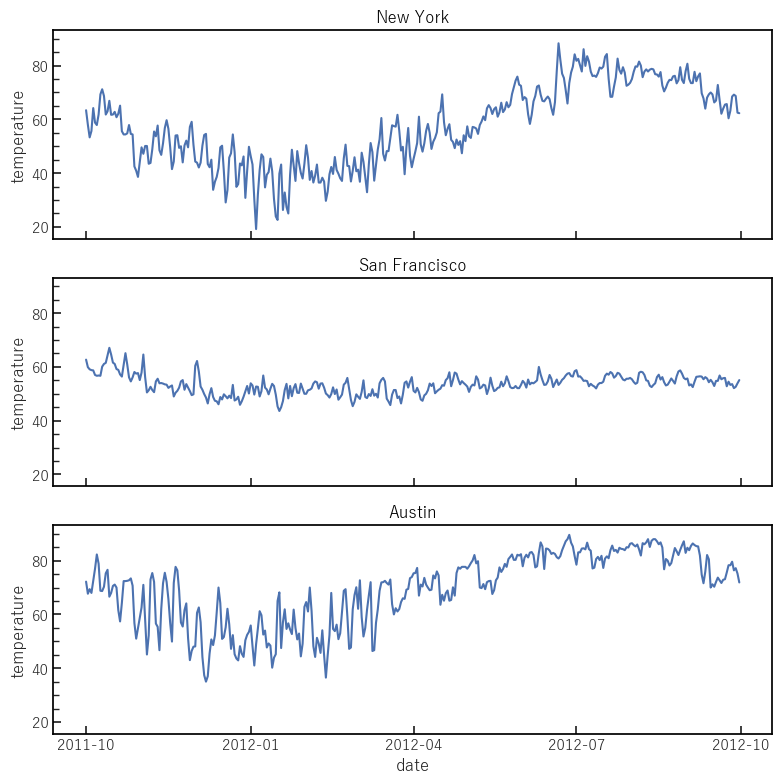

In [14]:
plot = (
    so.Plot(
        data=plot_df,
        x="date",
        y="temperature",
    )
    .theme({**base_style, "xtick.minor.visible": False,})
    .add(
        so.Line(),
    )
    .layout(size=(8, 8))
    .facet("city", wrap=1)
)

plot.show()

## 面グラフ(`seaborn.objects.Area()`と`seaborn.objects.Stack()`)

### 主な引数とその説明

[seaborn.objects.AreaのAPI](https://seaborn.pydata.org/generated/seaborn.objects.Area.html)


| 引数      | 説明            |
| --------- | ------------------------- |
|color|面の色。`str`型を渡す。`seaborn.objcets.Plot()`で設定していた場合、その内容を上書きする。|
|alpha|面の透明度。0～1の`float`型を渡す。|
|edgecolor|プロットの縁の色。`str`型を渡す。|
|edgealpha|プロットの縁の透明度。0～1の`float`型を渡す。|

In [15]:
stacked_area_df = pd.read_csv("../data/japan_energy.csv")
stacked_area_df = stacked_area_df.melt(
    id_vars="年度",
    value_name="供給量",
    var_name="エネルギー種"
)
stacked_area_df.head()

,年度,エネルギー種,供給量
0,1965,石油,3.56
1,1966,石油,4.13
2,1967,石油,5.11
3,1968,石油,5.95
4,1969,石油,7.19


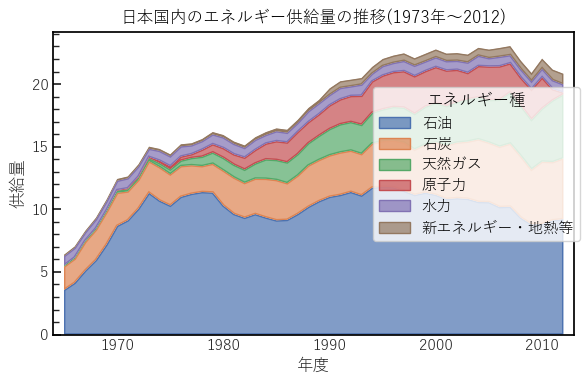

In [16]:
plot = (
    so.Plot(
        data=stacked_area_df,
        x="年度",
        y="供給量",
        color="エネルギー種"
    )
    .add(
        so.Area(alpha=0.7),
        so.Stack()
    )
    .theme({**base_style, "xtick.bottom": False})
    .layout(size=(6, 4))
    .limit(x=(1965 - 1, 2012 + 1))
    .label(
        title="日本国内のエネルギー供給量の推移(1973年～2012)",
    )
)
plot.show()

## 100%積み重ね棒グラフ(`seaborn.objects.Bar()`)

In [17]:
stacked_bar_100_df = pd.read_csv("../data/japan_energy.csv")
# %に変換
stacked_bar_100_df.iloc[:, 1:] = (
    stacked_bar_100_df.iloc[:, 1:].div(
        stacked_bar_100_df.iloc[:, 1:].sum(axis=1), axis=0
    ) * 100
)

stacked_bar_100_df = stacked_bar_100_df.melt(
    id_vars="年度",
    var_name="エネルギー種",
    value_name="供給量"
    )

stacked_bar_100_df.head()

,年度,エネルギー種,供給量
0,1965,石油,55.886970
1,1966,石油,58.748222
2,1967,石油,61.714976
3,1968,石油,63.841202
4,1969,石油,66.759517


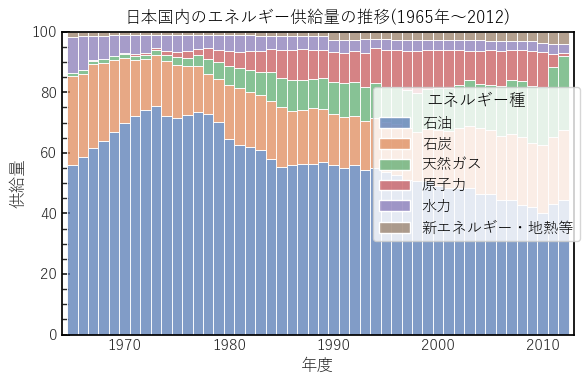

In [18]:
plot = (
    so.Plot(
        data=stacked_bar_100_df,
        x="年度",
        y="供給量",
        color="エネルギー種"
    )
    .add(
        so.Bars(),
        so.Stack()
    )
    .theme({**base_style, "xtick.bottom": False})
    .layout(size=(6, 4))
    .limit(x=(1965 - 1, 2012 + 1), y=(0, 100))
    .label(
        title="日本国内のエネルギー供給量の推移(1965年～2012)",
    )
)
plot.show()

## ヒストグラム（`seaborn.objects.Bar()`と`seaborn.objects.Hist()`の組み合わせ）

[seaborn.objects.HistのAPI](https://seaborn.pydata.org/generated/seaborn.objects.Hist.html)


| 引数      | 説明            |
| --------- | ------------------------- |
|stat|それぞれのbinの統計的な計算方法。`count`, `density`, `percent`, `probability`, `frequency`|
|bins|`int`型を渡す。binの数。|
|binwidth|`float`型を渡す。それぞれのbinの幅。|
|binrange|(min, max)とする。binの端の値となる。|
|cumulative|`True`にすると累計のヒストグラムとなる。|



In [19]:
hist_df = pd.read_csv("../data/diamond.csv")
hist_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


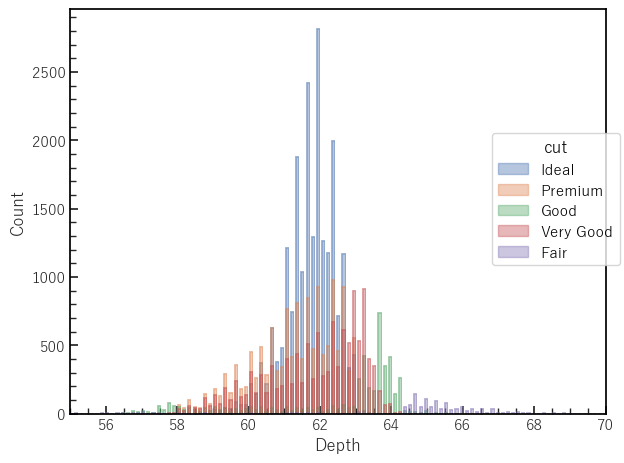

In [20]:
plot = (
    so.Plot(
        data=hist_df,
        x="depth",
        color="cut"
    )
    .add(
        so.Bar(alpha=0.4, edgealpha=0.4), so.Hist(bins=250)
    )
    .theme(base_style)
    .limit(x=(55, 70))
    .label(x="Depth", y="Count")
)

plot.show()